# Workshop 3: Linear, Time-Invariant Systems
## 3.1 Continuous-Time Systems: Convolution Integral
#### Convolution Integral (Superposition Integral)
$$y(t)) = \int_{-\infty}^{\infty} x(\tau)h(t-\tau)d\tau$$
This corresponds to the representaton of the continous time linear time-invariant (LTI) system in terms of its response to a unit impulse.
$$y(t) = x(t)*h(t)$$
Where $h(t)$ is the impulse response of the system and $x(t)$ is the input to the system.

A continuous-time LTI system is completely characterized by its response
to a single elementary signal, the unit impulse $\delta(t)$


### 3.1.1 Implementing Convolution Using Numerical Integration
Let $x(t) be the input to an LTI system with unit impulse response $h(t)$.

Where,
$$x(t) = e^{-at}u(t), a >0$$
and
$$h(t) = u(t).$$
Output of the system is
$$y(t) = x(t)*h(t)$$
Which is obtained when x(t) is fed to the system represented by $h(t)$.
![](image3.1.1.png)


for $t<0$,
$$x(\tau)h(t-\tau) = 0 => y(t) = 0$$

for $t>0$,
$$x(\tau)h(t-\tau) = \left\{
\begin{array}{ll}
      e^{-a\tau} & 0 < \tau <t \\
      0 & otherwise
\end{array} 
\right.$$

$$y(t) = \int_{0}^{t} e^{-a\tau}d\tau = \frac{1-e^{-at}}{a}$$

Thus for all $t$,
$$y(t) = \frac{1}{a}(1-e^{-at})u(t)$$
![](response.png)



Computation of the convolution integral to compute $y(t)$. useing numerical integration

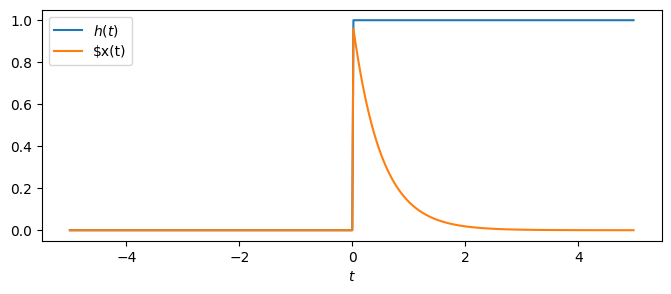

In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# unit step function
h = lambda t:(t>0)*1.0
# x(t)
a = 2 
x = lambda t:(t>0)*np.exp(-a*t)

# Sampling frequency for plotting
Fs = 50
# Time Range
T = 5
# time samples
t = np.arange(-T, T, 1/Fs)

plt.figure(figsize=(8,3))
plt.plot(t, h(t), label='$h(t)$')
plt.plot(t, x(t), label='$x(t)')
plt.xlabel(r'$t$')
plt.legend()


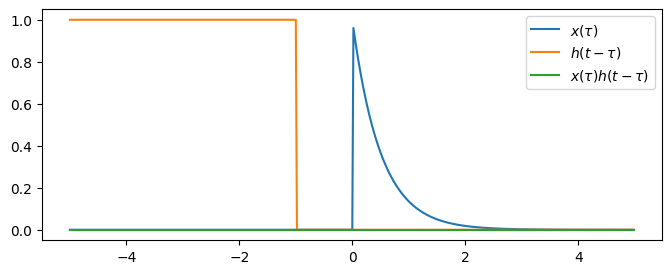

In [2]:
# plotting
t_ = -1
flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau) * h(t_ - tau)
plt.figure(figsize=(8,3))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t - \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t -\tau)$')
plt.legend()

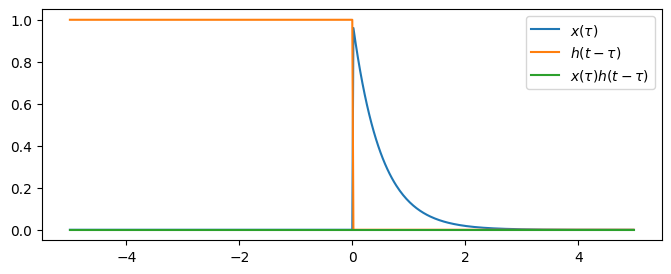

In [3]:
# plotting
t_ = 0
flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau) * h(t_ - tau)
plt.figure(figsize=(8,3))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t - \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t -\tau)$')
plt.legend()

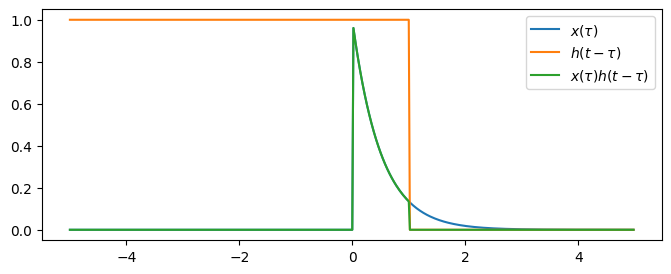

In [4]:
# plotting
t_ = 1
flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau) * h(t_ - tau)
plt.figure(figsize=(8,3))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t - \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t -\tau)$')
plt.legend()

C:\Users\PANKAJA\AppData\Local\Temp\ipykernel_14936\4164414531.py:5: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  y[n] = integrate.simps(product(t), t)


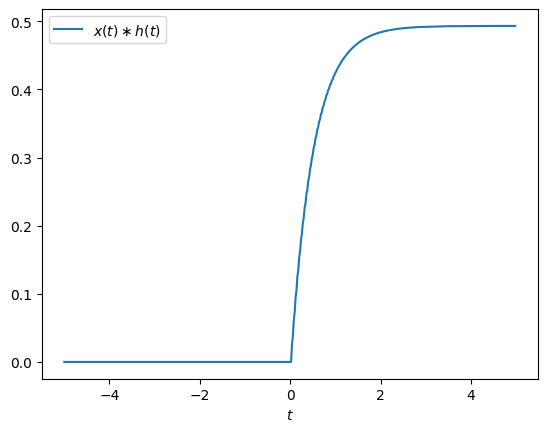

In [5]:
# Computing the convolution using integration
y = np.zeros(len(t))
for n, t_ in enumerate(t):
    product = lambda tau: x(tau) * h(t_ - tau)
    y[n] = integrate.simps(product(t), t)

plt.plot(t, y, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()



### 3.1.2 Convolving with a Signal Composed of Impulse Functions
Approximated impuse function $\delta(t)$,
![](approxdeltat.png)

As,
$$\Delta  -> 0  $$
$$\delta_{\Delta}(t) -> \delta(t)$$


Approximate implementation of the $\delta(t)$ 

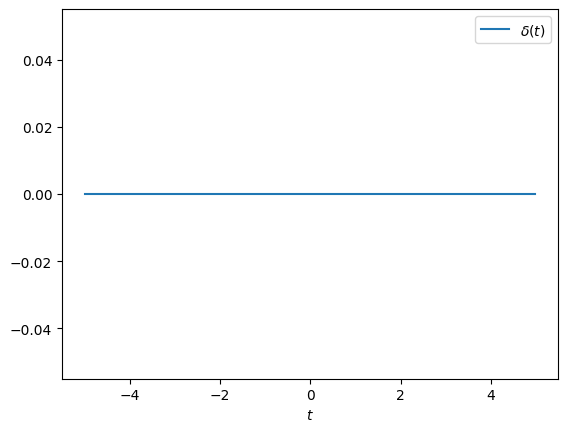

In [6]:
# Sampling Frequency
fs = 1000
delta = lambda t: np.array([fs/10 if 0 < t_ and t_ < 1/(fs/10) else 0.0 for t_ in t])

plt.plot(t, delta(t), label=r'$\delta(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()

Using Simpson's rule integration to finding the value of,

$$\int_{-\infty}^{\infty} \delta(t)dt$$

In [7]:
# Sampling frequency for plotting
Fs = 1000
# Time Range
T = 5
# time samples
t = np.arange(-T, T, 1/Fs)

y = integrate.simps(delta(t), t)

print(y)

0.0


C:\Users\PANKAJA\AppData\Local\Temp\ipykernel_14936\1750111638.py:4: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  y = integrate.simps(delta(t), t)
